This file shows exploration with matplotlib and pandas. First, I generated fake data to analyze. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def create_data(n, n_groups):
    """
    generate a set of fake data with group labels. 
    n data points and group labels are generated. 
    n_groups controls the number of distinct groups. 
    Returns an np.array() of integer group labels and an 
    np.array() of float data. 
    """
    
    # random group assignments as integers between 0 and n_groups-1, inclusive
    groups = np.random.randint(0, n_groups, n)
    
    # function of the groups plus gaussian noise (bell curve)
    data   = np.sin(groups) + np.random.randn(n)
    
    return(groups, data)

Next, I made a function to make and display faceted histograms from user specified data. 

In [337]:
# your solution here

def facet_hist(groups, data, m_rows, m_cols, figsize, **kwargs):
    """
    This function accepts grouped data to plot and dimensions 
    for subplots and produces the histogram for each group
    Parameters:
    Groups- differnt groups for the data to go in
    Data-the values 
    M_rows- the number of rows in the subplot
    M_cols- the number of cols in the subplot
    figsize- the dimensions of the printed graphs
    kwargs- additional keyword arguments, for example 
    color of graph, transparency, etc
    """
    
    #check if your data can be displayed (right number of rows and \
    #cols for the number of groups)
    #if not raise error
    if m_rows*m_cols!=len(np.unique(groups)):
        raise ValueError("Your rows*cols must be qual to\
        the total number or groups, try again")
    
   
    fig, ax= plt.subplots(m_rows,m_cols, figsize=figsize)#make subplots
    for k in range(m_rows*m_cols): 
        i=k//m_cols #rows
        j=k%m_cols #cols 
        #plot histogram of data for group n
        ax[i, j].hist(data[groups==k], **kwargs) 
        #give individual plot title 
        ax[i, j].set_title("Group " + str(k)) 
        
        #set x lables for bottom row
        if i==m_rows-1:
            ax[i, j].set(xlabel="x") 
            
        #set y labels for leftmost col
        if j==0:
            ax[i, j].set(ylabel="Density") 
         
    plt.tight_layout()  #make look nice     
                 

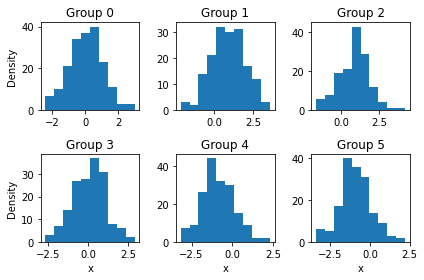

In [338]:
# test code
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4))


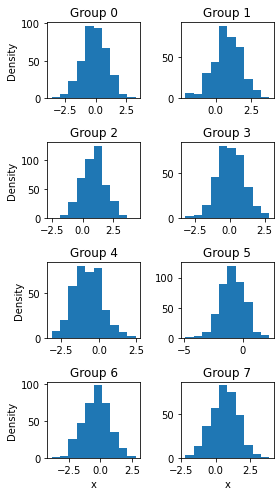

In [177]:
# test code
groups, data = create_data(3000, 8)
facet_hist(groups, data, 4, 2, figsize = (4, 7))

Next I modified the original function so it accepts kwargs. 

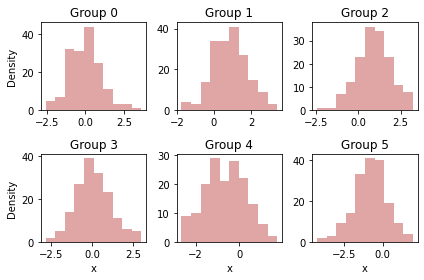

In [284]:
# run this code to show that your modified function works
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")

The next cell was provided to me in the assignment to following code get data from the World Happiness Report.

In [78]:
import pandas as pd
url = "https://philchodrow.github.io/PIC16A/datasets/world_happiness_report/2019.csv"
happiness = pd.read_csv(url)
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Next, I made a scatterplor of GDP vs Happiness Score.

Text(0, 0.5, 'Happiness Score')

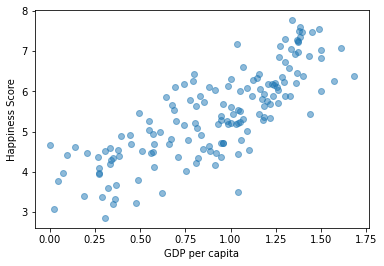

In [90]:
# plotting code here
fig, ax=plt.subplots(1)
ax.scatter(happiness["GDP per capita"], happiness["Score"], alpha=.5)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")

As anticipated, there is a strong positive correlation between GDP per capita and happiness score. This makes sense because stress over having enough money for basic necessities makes people less happy.

Next I created a function that makes a scatterplot of each combination of user specified columns to compare the respsective correlations. I calculated each correlation coefficient and put it as a caption below each graph. Below are some examples. 

In [366]:
# define your function

def scatterplot_matrix(cols, figsize):
    """
    This function uses the happiness data set and compares different
    correlations between happiness score and a predictor category/
    between predictor categories
    It accepts categories and figsize and produces cols^2
    scatterplots comparing each possible combination of 2 cols 
    This also produces the correlation coefficient for each plot
    Parameters:
    cols- the categories to compare 
    figsize- the dimensions for the subplots
    """
    size=len(cols) 
    #make blank subplots
    fig, ax= plt.subplots(size,size, figsize=figsize) 
    
    for k in range(size**2): 
        i=k//size #rows
        j=k%size #cols 
        ax[i, j].set_title(str(cols[i])) #set title
        ax[i, j].set(ylabel=str(cols[j]))#set y label
        
        if i!=j: #dont plot on the [i] x [i] plots
            #scatterplot of category x diff category
            ax[i, j].scatter(happiness[cols[i]], \
                             happiness[cols[j]], alpha=.5, s=15)
            
            #get the correlation coefficient
            coeff=np.corrcoef(happiness[cols[i]],\
                              happiness[cols[j]])[1,0]
                
            #display the correlation coefficient
            ax[i,j].set(xlabel = r"$\rho$ = " + str(np.round(coeff, 2)))
    plt.tight_layout() #make look nice   
                 

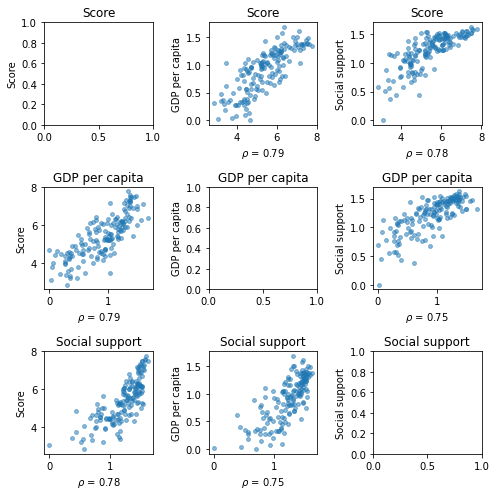

In [367]:
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))

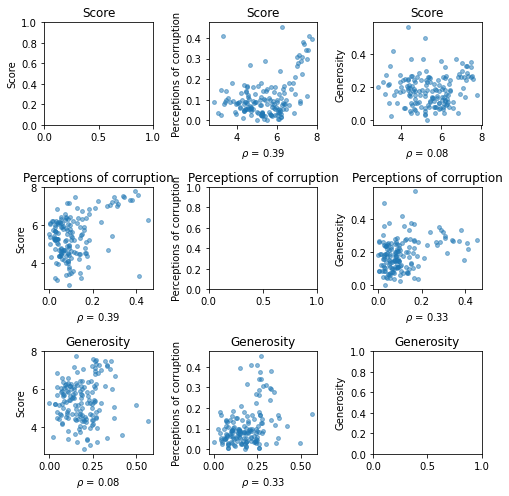

In [232]:
cols = ["Score", 
        "Perceptions of corruption", 
        "Generosity"
       ]
           
scatterplot_matrix(cols,figsize = (7,7))

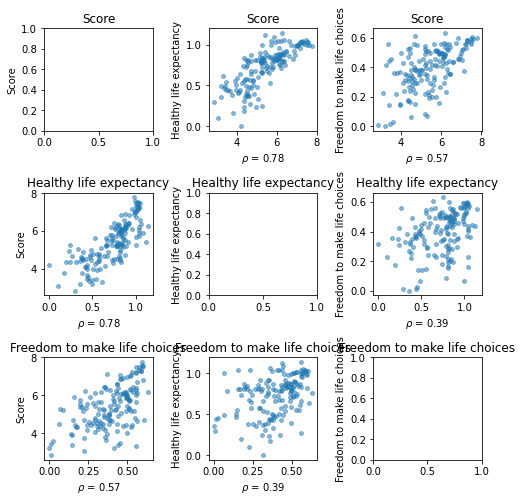

In [309]:

cols = ["Score", 
        "Healthy life expectancy", 
        "Freedom to make life choices"
       ]
           
scatterplot_matrix(cols,figsize = (7,7))


Some of the variables are correlated while others are not, for example, score and generousity are not correlated, perceptions of corruption are weakly correlated with score which I find somewhat interesting. Perhaps it is because having more social liberties/freedom of speech is correlated with weath and happiness so its easier to voice/spread ideas about hat the government is up to but only sometimes. But most times corruption makes people unhappy.


Some of these columns make sense to not be correlated, for example, generousity doesnt make sense to be related with score, I am not sure how they calculated generousity but I imagine it would be more of a cultural value than something that has to do with money. The high correlation value of social support makes a lot of sense to me because social support programs are really beneficial to many people. I interpret a lot of unhappiness to be related to stress, so having government social programs to take some of the worry off if the individual probably make people happier.  I did not see any negative correlations in the above graphs that doesnt mean there are none, I imagine corruption would have a negative correlation with some of the other variables. The quantitative results do match what I see.

If I were to make a model to predict happiness from other factors, I would use Wealth and Social Support. I might use Life Expectancy, because it is also related to those factors. A low Life Expectancy could also signal war, famine, colonial regime etc, which would make people unhappy. Freedom to make life choices also is correlated with happiness, but slightly less than I would intially think.



## Plotting Time Series
The following cell was given to me on the original assignment to get historical data on the Dow Jones Industrial Average (via Yahoo Finance) and Cumulative Covid Cases (via New York Times)

In [233]:
import pandas as pd
import datetime

url = "https://query1.finance.yahoo.com/v7/finance/download/%5EDJI?period1=1580750232&period2=1612372632&interval=1d&events=history&includeAdjustedClose=true"
DJI = pd.read_csv(url)
DJI['date'] = pd.to_datetime(DJI['Date'])
DJI = DJI.drop(["Date"], axis = 1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
COVID = pd.read_csv(url)
COVID['date'] = pd.to_datetime(COVID['date'])

First I transformed the daily cumulative covid case data into daily new case data.

In [341]:
# your solution here
per_day=np.diff(COVID['cases'])
#no difference calcultion for the first day 
per_day_date=COVID['date'][1:657] 

In [261]:
DJI['date']

0     2020-02-03
1     2020-02-04
2     2020-02-05
3     2020-02-06
4     2020-02-07
         ...    
249   2021-01-28
250   2021-01-29
251   2021-02-01
252   2021-02-02
253   2021-02-03
Name: date, Length: 254, dtype: datetime64[ns]

Next I plotted these two datasets on the same time axis to compare them. 

Text(0.5, 0.98, 'Covid Cases vs Dow Jones Industrial Average')

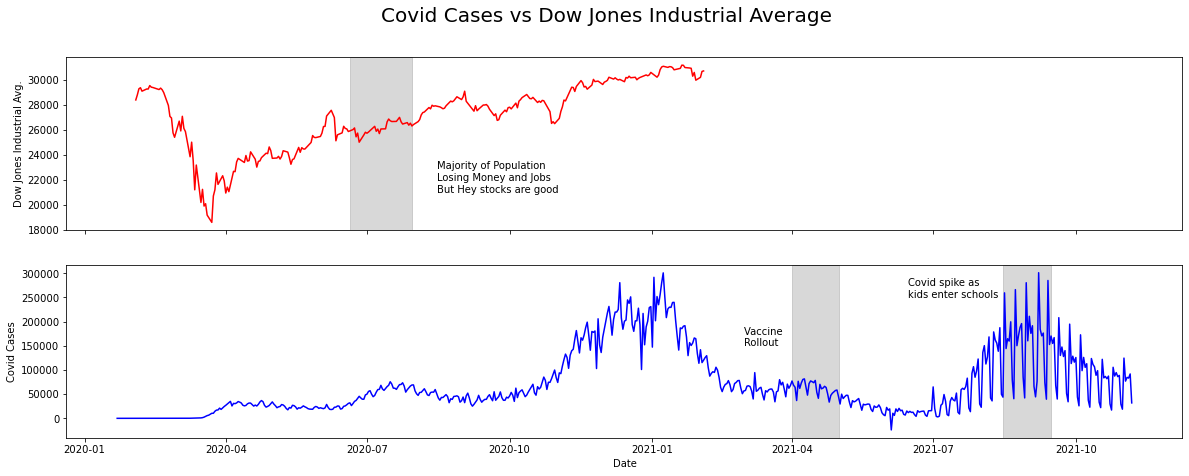

In [365]:
# modify this block in the remaining parts of the problem 

#create 2 subplots, share x axis, wide and short
fig, ax= plt.subplots(2,sharex=True, figsize = (20,7))

#first plot is stock data, Date vs DJI
ax[0].plot(DJI['date'], DJI['Close'], color="Red")

#second plot is covid data, date vs cases
ax[1].plot(per_day_date, per_day, color="Blue")

#both x are date
plt.xlabel("Date")

#add respective y labels
ax[0].set_ylabel("Dow Jones Industrial Avg.")
ax[1].set_ylabel("Covid Cases")

#Highlight some important areas
ax[0].axvspan(datetime.datetime(2020,6,20),
              datetime.datetime(2020,7,30), 
              alpha = .3, 
              color = "gray")

ax[0].text(datetime.datetime(2020,8,15), 
           21000, 
           "Majority of Population \nLosing Money and Jobs\
           \nBut Hey stocks are good")


ax[1].axvspan(datetime.datetime(2021,4,1),
              datetime.datetime(2021,5,1), 
              alpha = .3, 
              color = "gray")

ax[1].text(datetime.datetime(2021,3,1), 
           150000, 
           "Vaccine \nRollout")


ax[1].axvspan(datetime.datetime(2021,8,15),
              datetime.datetime(2021,9,15), 
              alpha = .3, 
              color = "gray")

ax[1].text(datetime.datetime(2021,6,15), 
           250000, 
           "Covid spike as \nkids enter schools")


#big title
fig.suptitle('Covid Cases vs Dow Jones Industrial Average', size=20)


